<a href="https://colab.research.google.com/github/Pete-Nime/Credit_Card_Fraud_Detection/blob/main/Copy_of_IDD_Peter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies **

Very important, makes code availabe from one module to another, make code productive, and productive.

In [ ]:
import numpy as np #multidimensional array and matric procession
import pandas as pd #data cleaning and analysis
import sklearn #provide unifrom in workflow
import scipy #solving mathematical equations and algorithm
import matplotlib.pyplot as plt #data visualisation 
import seaborn as sns #data visualisation 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import OneClassSVM
from pylab import rcParams #control default in matplotlib
from sklearn.linear_model import LogisticRegression
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Valid = 0", "Fraud = 1"]

**Reading CSV file with pandas**

Storing csv file onto credit card data

In [ ]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

**CSV File Attached with googel colab notebook.**

Attached csv file from google drive on to google colab with a copy of it attached on to the google dirve. Thus the csv file will still be attached when resuming. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Dataset on to a Pandas DataFrame.**

Pandas is a library in the python that help us to do analysis on the given data.

**Data Exploration**

Following data display all the transection withine a given time.

In [ ]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Observation**

Following method autimatically display first five rows and column of the credit card fraud detection data.

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(credit_card_data.shape)
print(credit_card_data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card_data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

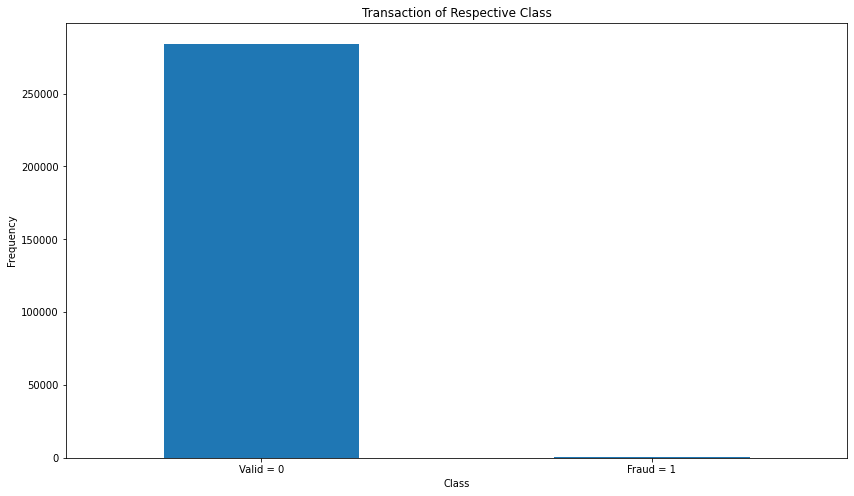

In [ ]:
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction of Respective Class")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

Pre-Processing 

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Determine number of fraud cases in dataset
fraud = credit_card_data[credit_card_data['Class'] == 1]
valid = credit_card_data[credit_card_data['Class'] == 0]
print('Fraud Cases: {}'.format(len(credit_card_data[credit_card_data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(credit_card_data[credit_card_data['Class'] == 0])))

Fraud Cases: 492
Valid Transactions: 284315


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

Apply statistic method to fraudlant data


In [ ]:
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Apply statistic method to valid data

In [ ]:
print(valid.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Compare the value for both transection

In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Since it is an unbalance data set, will used undersampeling method

extract equal amount data set (fraud, legit) sample   with  equal amount of data set to test it out as a sample. 

In [ ]:
valid_sample = valid.sample(n=492)

Concatenating fraud & valid transection

In [ ]:
new_dataset = pd.concat([valid_sample, fraud], axis = 0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
218007,141132.0,2.253948,-1.367064,-0.564595,-1.484234,-1.438849,-0.605422,-1.264424,-0.156170,-1.158893,...,-0.113534,0.202233,0.339387,1.081757,-0.307627,-0.231267,0.029148,-0.032998,15.80,0
17180,28502.0,1.089932,0.134417,0.095033,0.446884,-0.042834,-0.553467,0.349823,-0.096688,-0.555864,...,-0.255296,-0.855510,0.139671,0.229543,0.156968,0.131164,-0.056389,0.007543,54.90,0
5076,4722.0,-1.020056,1.513777,-0.497236,0.383904,2.077564,4.265469,-0.775033,-0.314560,0.704301,...,1.338910,-0.846445,0.059090,0.929283,0.115006,-0.277784,0.109184,0.076604,29.99,0
182052,125239.0,-10.696808,-7.641040,-3.724116,2.606798,-0.043210,-0.667513,1.483837,-5.149505,2.820889,...,1.341146,-0.410595,-2.328650,0.505913,-2.049728,-1.264967,0.146017,-3.398699,233.18,0
190755,128973.0,1.808351,-0.361198,0.524747,1.628130,-1.397718,-0.840475,-0.736487,0.037516,1.248115,...,0.118355,0.401836,0.373735,0.864124,-0.498563,-0.812347,0.068533,-0.007724,35.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94016.626016,-0.168152,0.008685,-0.024386,-0.105133,0.040246,0.018342,-0.028436,0.025257,0.010120,...,-0.023456,0.050181,-0.000058,0.003241,0.02087,-0.012402,-0.024662,-0.000931,-0.019715,87.809980
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


Divide the data into target and features 

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time         V1        V2        V3        V4        V5        V6  \
218007  141132.0   2.253948 -1.367064 -0.564595 -1.484234 -1.438849 -0.605422   
17180    28502.0   1.089932  0.134417  0.095033  0.446884 -0.042834 -0.553467   
5076      4722.0  -1.020056  1.513777 -0.497236  0.383904  2.077564  4.265469   
182052  125239.0 -10.696808 -7.641040 -3.724116  2.606798 -0.043210 -0.667513   
190755  128973.0   1.808351 -0.361198  0.524747  1.628130 -1.397718 -0.840475   
...          ...        ...       ...       ...       ...       ...       ...   
279863  169142.0  -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0   1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0  -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0  -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0   1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8 

In [ ]:
print(Y)

218007    0
17180     0
5076      0
182052    0
190755    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


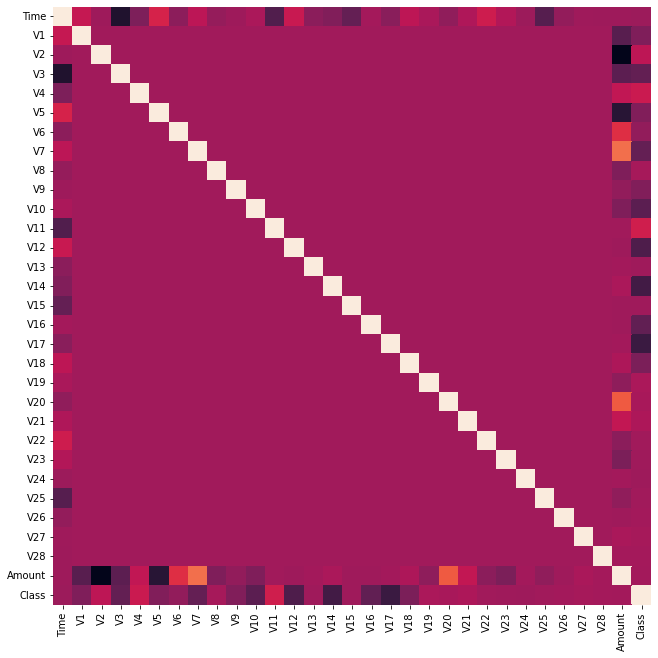

In [ ]:
# Correlation matrix (help in monitor the buying patter of the customers)
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (14, 11))
sns.heatmap(corrmat, cbar=False, vmax = .8, square = True)
plt.show()

In [ ]:
#training and testing data bifurcation
from sklearn.model_selection import train_test_split 
#split the data into training and testing sets 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 4) 

In [ ]:
print(X.shape, X_Train.shape, X_Test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
#building the Random Forest Classifier (Compose of decesion tree)
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(X_Train, Y_Train) 
#predictions 
yPred = rfc.predict(X_Test) 


In [ ]:
rfc.score(X_Test,Y_Test)

0.9187817258883249

In [ ]:
#building all kinds of evaluating parameters
#from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != Y_Test).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(Y_Test, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(Y_Test, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_Test, yPred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(Y_Test, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(Y_Test, yPred) 
print("The Matthews correlation coefficient is {} ".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9187817258883249
The precision is 0.9456521739130435
The recall is 0.8877551020408163
The F1-Score is 0.9157894736842105
The Matthews correlation coefficient is 0.8390681862534862 


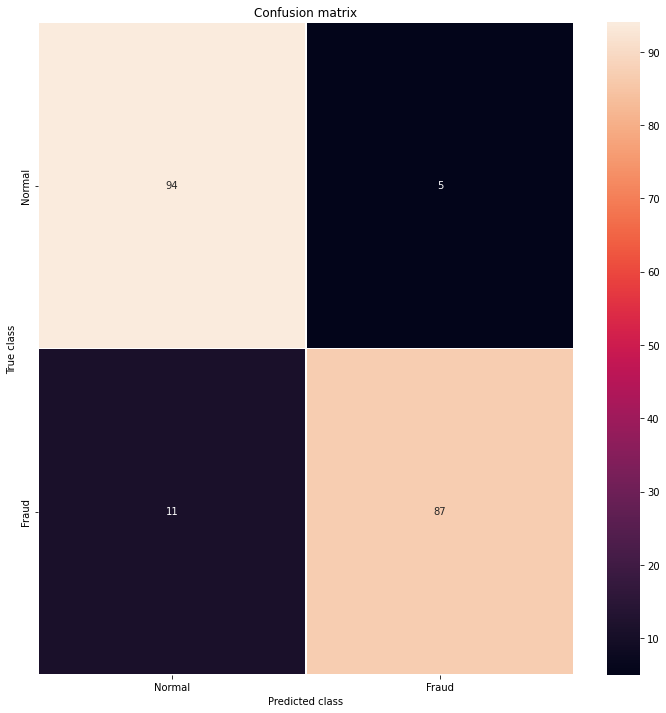

In [ ]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_Test, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap( conf_matrix, linewidths=.5, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#Model Training 

#Logistic Regression 
- is a predictive analysis model in a supervised learning environment 

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_Train, Y_Train)

LogisticRegression()

#Evaluation & Accurcy Score


In [ ]:
# accuracy on training data
X_Train_prediction = model.predict(X_Train)
training_data_accuracy = accuracy_score(X_Train_prediction, Y_Train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9440914866581956


In [ ]:
# accuracy on test data
X_Test_prediction = model.predict(X_Test)
test_data_accuracy = accuracy_score(X_Test_prediction, Y_Test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


#Hyperparameter Tuning 
Is mainly dealing with optimal perfomrance of the hyperparameters (higher values) of value models  of parameter that learning algorithms use.

Two features will be use in tuning the hypaparameter, max_features (number of features that will be use to construct the preditctions model). While n_estimators is the number of trees that will be using to construct the prediction model.

GridSearchCV - Mainly search through the given set of concrete parameter value from the given set of grid parameter. In our case will use max_estimators & n_estimators. 

In [ ]:
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,7,1)
n_estimators_range = np.arange(10,240,10)
param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range)

rfc = RandomForestClassifier(max_features = 6, n_estimators = 100)

grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 6)

In [ ]:
grid.fit(X_Train, Y_Train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(max_features=6),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230])})

In [ ]:
print("The best parameters are %s with the score of %0.2f " % (grid.best_params_, grid.best_score_)) 

The best parameters are {'max_features': 5, 'n_estimators': 30} with the score of 0.95 


#Dataframe of Grid Search Parameters & their Accuracy Scores 
From here will be exporting the grid search parameters and their resulting accuracy score inot the dataframe. 

In [ ]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,1,10,0.933910
1,1,20,0.938989
2,1,30,0.935172
3,1,40,0.940252
4,1,50,0.940252


#Sorting Data for the contour (horizontal margine) the plots

before constructing contour plots, we will adjust the data into more convenient  form to flow well with  contour plot functions.

Firstly, we will be using Pandas' groupby() function to segment the data into groups based on the 2 hyperparameters: max_features and n_estimators.

In [ ]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.933910
             20            0.938989
             30            0.935172
             40            0.940252
             50            0.940252
...                             ...
6            190           0.937707
             200           0.937707
             210           0.936425
             220           0.937707
             230           0.938970

[138 rows x 1 columns]

#Pivoting/tabling  the data
table the data  into an m by n matrix where rows and columns correspond to the max_features and n_estimators, respectively.

In [ ]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.933910  0.938989  0.935172  0.940252  0.940252  0.942806   
2             0.930083  0.935172  0.940242  0.938970  0.938979  0.941524   
3             0.930083  0.932618  0.933910  0.931356  0.944049  0.937698   
4             0.938960  0.937698  0.932618  0.933890  0.933890  0.936425   
5             0.932628  0.940242  0.947866  0.941524  0.933890  0.935163   
6             0.936435  0.932609  0.935153  0.937707  0.941514  0.941514   

                                                      ...                      \
n_estimators       70        80        90        100  ...       140       150   
max_features                                          ...                       
1             0.941534  0.936445  0.935172  0.937707  ...  0.940252  0.936435   
2             0.941524  0.945331  0.942796  0.940261  ...  0.936435  0.937707   
3             0.933890  0.936435  0.941505  0.935163  ...  0.940242  0.944069   
4             0.940252  0.941524  0.938979  0.940252  ...  0.941524  0.937707   
5             0.938989  0.941514  0.935172  0.936435  ...  0.940252  0.938989   
6             0.936425  0.936435  0.936435  0.935163  ...  0.937707  0.936425   

                                                                          \
n_estimators       160       170       180       190       200       210   
max_features                                                               
1             0.938989  0.941534  0.937717  0.936445  0.938979  0.942796   
2             0.940252  0.940252  0.940261  0.942796  0.942796  0.938979   
3             0.938979  0.940252  0.941524  0.940242  0.941524  0.938979   
4             0.940242  0.940252  0.937707  0.942796  0.938979  0.941524   
5             0.938979  0.937707  0.940252  0.942796  0.935163  0.937707   
6             0.940252  0.936445  0.940252  0.937707  0.937707  0.936425   

                                  
n_estimators       220       230  
max_features                      
1             0.936454  0.935182  
2             0.941524  0.944069  
3             0.942787  0.940242  
4             0.936435  0.937717  
5             0.942787  0.940252  
6             0.937707  0.938970  

[6 rows x 23 columns]

#Now we can assign the pivoted data into the respective x, y and z variables.

In [ ]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

#2D Contour Plot
lets visualizing the landscape of the 2 hyperparameters that we are tuning and their influence on the accuracy score.

In [ ]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

#3D Surface Plot
now let us view the graph in 3D surface plot. It's interest cause we can rotate the plot in the graph

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

#Model Training for Logistic Regression

#Training Logistic Regression with training data

#What is Logistic Regression
Famous statistical method for predicting two or more binary classes; not continues numbers.
Hence, Logistic regression is used for classification problems
To make it work, we transform our linear regression line into a logistic regression curve so we can get a good fit of our data (see pics below)

In [ ]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_Train, Y_Train)



LogisticRegression(random_state=10)

In [ ]:
log_reg.fit(X_Train, Y_Train)

LogisticRegression(random_state=10)

In [ ]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_Train)
y_pred = log_reg.predict(X_Train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_Train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-2.76847913e-05,  2.56320269e-01, -6.96909610e-02,
        -5.27890539e-01,  7.71398202e-01,  1.84608962e-01,
        -3.31266161e-01, -1.21524271e-01, -2.45707027e-01,
        -2.08995608e-01, -3.63473936e-01,  1.74006449e-01,
        -5.03958338e-01, -6.35616376e-02, -8.09515720e-01,
        -1.71836888e-01, -2.08115773e-01, -3.08533828e-01,
        -5.59070126e-03, -4.72968150e-02,  2.10540905e-03,
        -2.44267170e-02,  7.52732062e-02, -5.18794844e-02,
        -4.33821598e-02, -2.99654223e-02, -3.71862738e-02,
         1.15222411e-02,  1.63780768e-02,  4.87331032e-04]])

#Model Evaluation & Accuracy Score

In [ ]:
## Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_Train, Y_Train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_Test, Y_Test))


# Classification Report
print(classification_report(Y_Train, y_pred))

The Training Accuracy is:  0.9440914866581956
The Testing Accuracy is:  0.9289340101522843
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       393
           1       0.96      0.93      0.94       394

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



In [ ]:
# Confusion Matrix function/error matrix (table that describe the performance of the classified table)

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

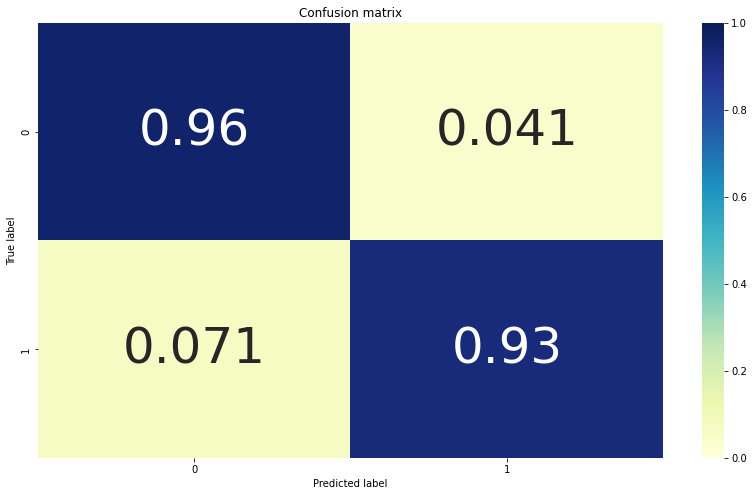

In [ ]:
# Visualizing cm

cm = confusion_matrix(Y_Train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
log_reg.classes_


array([0, 1])

In [ ]:
cm.sum(axis=1)
cm_norm

array([[0.95928753, 0.04071247],
       [0.07106599, 0.92893401]])

In [ ]:
cm

array([[377,  16],
       [ 28, 366]])

In [ ]:
cm.sum(axis=0)

array([405, 382])

In [ ]:
np.diag(cm)

array([377, 366])

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.95928753 0.92893401]
The Precision is: [0.9308642  0.95811518]
The False positive rate is: [0.07106599 0.04071247]
The False Negative Rate is:  [0.04071247 0.07106599]

The average TPR is: 0.9441107709794501
The average Precision is: 0.9444896903884688
The average False positive rate is: 0.055889229020549984
The average False Negative Rate is: 0.055889229020549984


In [ ]:
from sklearn.metrics import log_loss
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(Y_Train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_Test)
print("The Log Loss on Testing Dataset is: ", log_loss(Y_Test, pred_proba_t))

The Log Loss on Training is:  0.16073172571265051
The Log Loss on Testing Dataset is:  0.18953844391818903


#Hyper Parameter Tuning

We will loop over parameter C (Inverse of regularization strength).
Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

In [ ]:
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

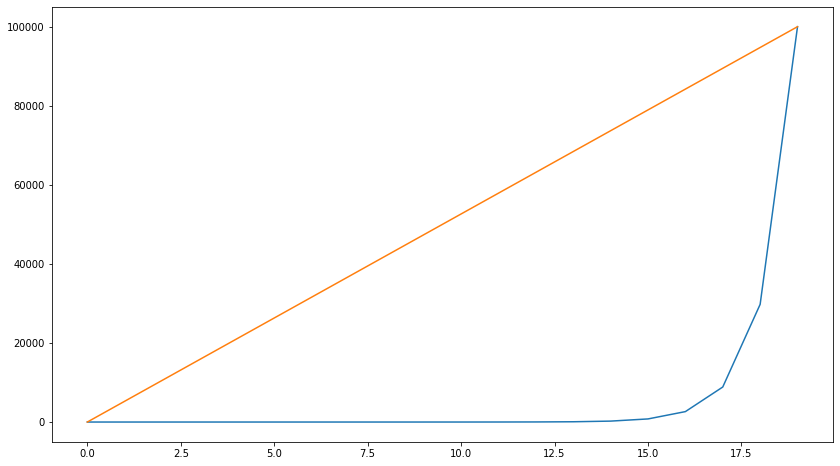

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [ ]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_Train, Y_Train)
    score = log_reg2.score(X_Test, Y_Test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_Test)
    log_loss2 = log_loss(Y_Test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.7918781725888325:
The Logg Loss of C parameter 1e-05 is 0.5817093271255921:

The CA of C parameter 3.359818286283781e-05 is 0.868020304568528:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.49923784203157806:

The CA of C parameter 0.00011288378916846884 is 0.883248730964467:
The Logg Loss of C parameter 0.00011288378916846884 is 0.40987398807832764:

The CA of C parameter 0.000379269019073225 is 0.9086294416243654:
The Logg Loss of C parameter 0.000379269019073225 is 0.3271923037409367:

The CA of C parameter 0.0012742749857031334 is 0.8934010152284264:
The Logg Loss of C parameter 0.0012742749857031334 is 0.303931554137798:



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



The CA of C parameter 0.004281332398719391 is 0.9238578680203046:
The Logg Loss of C parameter 0.004281332398719391 is 0.22685520637230755:

The CA of C parameter 0.01438449888287663 is 0.9289340101522843:
The Logg Loss of C parameter 0.01438449888287663 is 0.202764510525859:

The CA of C parameter 0.04832930238571752 is 0.9238578680203046:
The Logg Loss of C parameter 0.04832930238571752 is 0.18983181062867657:

The CA of C parameter 0.1623776739188721 is 0.9238578680203046:
The Logg Loss of C parameter 0.1623776739188721 is 0.1882287800766112:

The CA of C parameter 0.5455594781168515 is 0.9289340101522843:
The Logg Loss of C parameter 0.5455594781168515 is 0.18905147011340864:

The CA of C parameter 1.8329807108324339 is 0.9289340101522843:
The Logg Loss of C parameter 1.8329807108324339 is 0.20156696444343744:

The CA of C parameter 6.1584821106602545 is 0.9289340101522843:
The Logg Loss of C parameter 6.1584821106602545 is 0.19027303709413965:



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



The CA of C parameter 20.6913808111479 is 0.9187817258883249:
The Logg Loss of C parameter 20.6913808111479 is 0.22630818577356335:

The CA of C parameter 69.51927961775606 is 0.9289340101522843:
The Logg Loss of C parameter 69.51927961775606 is 0.19043657433020836:



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



The CA of C parameter 233.57214690901213 is 0.9238578680203046:
The Logg Loss of C parameter 233.57214690901213 is 0.22711900199992233:

The CA of C parameter 784.7599703514607 is 0.9289340101522843:
The Logg Loss of C parameter 784.7599703514607 is 0.1904515118531083:

The CA of C parameter 2636.6508987303555 is 0.9289340101522843:
The Logg Loss of C parameter 2636.6508987303555 is 0.19045240173495895:

The CA of C parameter 8858.667904100832 is 0.9289340101522843:
The Logg Loss of C parameter 8858.667904100832 is 0.19045251402595198:

The CA of C parameter 29763.51441631313 is 0.9289340101522843:
The Logg Loss of C parameter 29763.51441631313 is 0.19045176633719507:

The CA of C parameter 100000.0 is 0.9289340101522843:
The Logg Loss of C parameter 100000.0 is 0.1904528985324286:



In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,8,0.162378,0.923858,0.188229
1,9,0.545559,0.928934,0.189051
2,7,0.048329,0.923858,0.189832
3,11,6.158482,0.928934,0.190273
4,13,69.519280,0.928934,0.190437
5,15,784.759970,0.928934,0.190452
6,18,29763.514416,0.928934,0.190452
7,16,2636.650899,0.928934,0.190452
8,17,8858.667904,0.928934,0.190453
9,19,100000.000000,0.928934,0.190453


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_Train, Y_Train)
print("The CA is:", Log_reg3.score(X_Test, Y_Test))
pred_proba_t = Log_reg3.predict_proba(X_Test)
log_loss3 = log_loss(Y_Test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)



The CA is: 0.9187817258883249
The Logistic Loss is:  0.19780822137679335
The optimal C parameter is:  [20.69138081]
